# Ciência dos Dados - PROJETO 1

## Abel Cavalcante e Theo Barbara

## Projeto de Análise e Filtragem de Dados

## Introdução

Esse projeto tem como objetivo principal analisar o perfil geral da População Economicamete Ativa. Pensando ainda nesse perfil, queremos responder a pergunta: Qual é o perfil educacional da População Economicamente Ativa brasileira?

## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('PES2015.csv')
data.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


As variáveis utilizadas para o cumprimento do nosso objetivo serão:

- UF (Unidade Federativa);
- V8005 (Idade do morador);
- V0601 (Saber ler e escrever);
- V6002 (Rede de ensino);
- V4803 (Anos de estudo);
- V4713 (Condição de atividade no trabalho principal do período de referência de 365 dias para pessoas de 10 anos ou mais de idade).

In [3]:
data_filtro = data[['UF', "V8005", "V0601", "V6002", "V4803", "V4713"]][data["V8005"] > 10][data["V8005"] < 65]
data_filtro.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,UF,V8005,V0601,V6002,V4803,V4713
0,11,23,1,NaN,12,1.0
1,11,23,1,NaN,12,1.0
2,11,35,1,4.0,15,1.0
3,11,34,1,NaN,15,1.0
4,11,11,1,4.0,4,2.0


Antes de começarmos a programar, vamos redefinir o nome de algumas variáveis:

In [4]:
data_filtro.columns = ['UF', 'MORADOR_IDADE', 'SABER_LER', 'REDE_ENSINO', 'ANOS_ESTUDO', 'PEA']
data_filtro.head()

,UF,MORADOR_IDADE,SABER_LER,REDE_ENSINO,ANOS_ESTUDO,PEA
0,11,23,1,NaN,12,1.0
1,11,23,1,NaN,12,1.0
2,11,35,1,4.0,15,1.0
3,11,34,1,NaN,15,1.0
4,11,11,1,4.0,4,2.0


Temos, assim, que a variável "População Economicamente Ativa" pode ser definida como sendo a variável "V4713". Assim,  pretendemos usar essa variável como base de estudo.

In [5]:
data_filtro[['PEA']].head()

,PEA
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0


Podemos também ver que essa variável possui duas opções: "1.0", que significa que a pessoa é Economicamente ativa e "2.0", que significa que a pessoa é Economicamente inativa.

In [6]:
data_filtro.PEA.value_counts()

1.0    186168
2.0     83402
Name: PEA, dtype: int64

Como queremos medir o perfil das pessoas economicamente ativas, ignoraremos a parcela que se encontra em "2.0"

In [7]:
ativos = data_filtro[data_filtro.PEA == 1]
ativos.PEA.value_counts()

1.0    186168
Name: PEA, dtype: int64

Também filtraremos os dados que estão como "NaN":

In [8]:
ativos = ativos.fillna(0)
ativos.head()

,UF,MORADOR_IDADE,SABER_LER,REDE_ENSINO,ANOS_ESTUDO,PEA
0,11,23,1,0.0,12,1.0
1,11,23,1,0.0,12,1.0
2,11,35,1,4.0,15,1.0
3,11,34,1,0.0,15,1.0
7,11,18,1,0.0,12,1.0


Assim, temos que o dataframe 'ativos' contém apenas as pessoas economicamente ativas. Com isso, podemos trabalhar com as variáveis:

In [9]:
# Vamos separar a variável "UF" em regiões, para melhor visualização:
if 'REGIAO' not in ativos:
    ativos.loc[(ativos.UF>10)&(ativos.UF<20), "REGIAO"] = "Norte"
    ativos.loc[(ativos.UF>20)&(ativos.UF<30), "REGIAO"] = "Nordeste"
    ativos.loc[(ativos.UF>30)&(ativos.UF<37), "REGIAO"] = "Sudeste"
    ativos.loc[(ativos.UF>40)&(ativos.UF<48), "REGIAO"] = "Sul"
    ativos.loc[(ativos.UF>49)&(ativos.UF<56), "REGIAO"] = "Centro-Oeste"
else:
    pass
    
ativos.head()

# Definiremos quais variáveis são qualitativas:
ativos.UF = ativos.UF.astype('category')
ativos.SABER_LER = ativos.SABER_LER.astype('category')
ativos.REDE_ENSINO = ativos.REDE_ENSINO.astype('category')
ativos.PEA = ativos.PEA.astype('category')

ativos.UF.cat.categories = ("Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco", "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal")
ativos.SABER_LER.cat.categories = ("Sim", "Não")
ativos.REDE_ENSINO.cat.categories = ("Não Aplicável","Pública", "Privada")
ativos.PEA.cat.categories = (["Economicamente ativas"])

ativos.head()

,UF,MORADOR_IDADE,SABER_LER,REDE_ENSINO,ANOS_ESTUDO,PEA,REGIAO
0,Rondônia,23,Sim,Não Aplicável,12,Economicamente ativas,Norte
1,Rondônia,23,Sim,Não Aplicável,12,Economicamente ativas,Norte
2,Rondônia,35,Sim,Privada,15,Economicamente ativas,Norte
3,Rondônia,34,Sim,Não Aplicável,15,Economicamente ativas,Norte
7,Rondônia,18,Sim,Não Aplicável,12,Economicamente ativas,Norte


## Análise de variáveis

Vamos explorar o perfil das pessoas Economicamente Ativas por região e por idade:

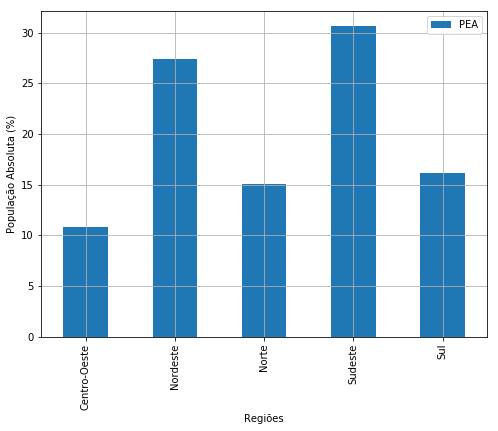

In [29]:
# Comparação região Vs População Economicamente Ativa
pea_reg = pd.crosstab(ativos.REGIAO, ativos.PEA, normalize = True) * 100
pea_reg.plot(kind='bar', figsize=(8, 6))
plt.ylabel("População Absoluta (%)")
plt.xlabel("Regiões")
plt.legend(["PEA"])
plt.grid(True);

No gráfico acima, é possível observar que a população economicamente ativa está localizada principalmente nas regiões Sudeste e Nordeste. 

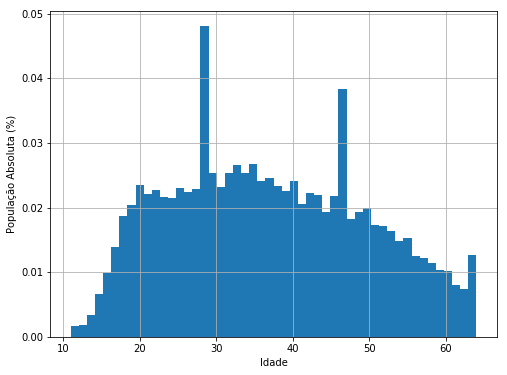

In [53]:
# Comparação idade Vs População Economicamente Ativa
ativos.MORADOR_IDADE.plot.hist(density=True, bins = 50, figsize=(8, 6))
plt.ylabel("População Absoluta (%)")
plt.xlabel("Idade")
plt.grid(True);

O gráfico acima, mostra a relação entre a população economicamente ativa e a idade. Podemos notar que há uma grande quantidade de indivíduos entre 20 e 50 anos. Mais particularmente em idades próximas a 30 anos de idade e entre 40 e 50 anos de idade. 

Esses dados mostram alguams informações interessantes: Regiões como a Suldeste e Nordeste são a que apresentam o maior número de pessoas economicamente ativas, enquanto a capital do país, a região Centro-Oeste é a menos produtiva.

Além disso, é possível observar que, apesar de contra lei, há uma pequena taxa de pessoas com menos de 16 anos considerada como economicamente ativa.

#### Educação

Agora, vamos explorar o perfil das População Economicamente Ativa pensando em sua educação. Para isso, vamos considerar três variáveis: saber ler e escrever, a rede de ensino frequentada e os anos de estudo dessas pessoas, além de compará-las entre sí:

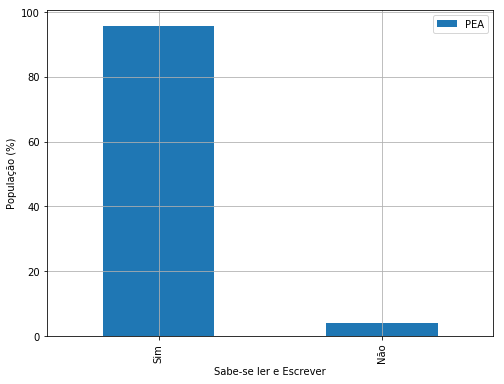

In [10]:
# População Economicamente Ativa vs Saber ler e escrever
pea_uf = pd.crosstab(ativos.SABER_LER, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6),)
plt.ylabel("População (%)")
plt.xlabel('Sabe-se ler e Escrever')
plt.legend(["PEA"])
plt.grid(True);

Como já era de se esperar, o gráfico acima mostra que a grande maioria da população economicamente ativa sabe ler e escrever, restando uma pequena minoria para os que não sabem nem ler, nem escrever. 

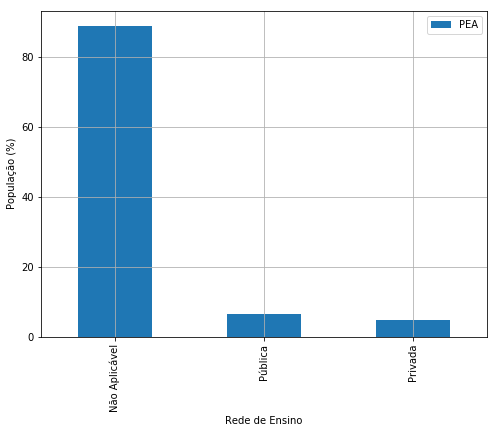

In [11]:
# População Economicamente Ativa vs Rede de ensino
pea_uf = pd.crosstab(ativos.REDE_ENSINO, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6),)
plt.ylabel("População (%)")
plt.xlabel('Rede de Ensino')
plt.legend(["PEA"])
plt.grid(True);

O gráfico acima relaciona a população economicamente ativa com a rede de ensino frequentada e, a grande maioria não frequentou ou não frequenta nenhuma rede de ensino, quer seja pública, quer seja privada. 

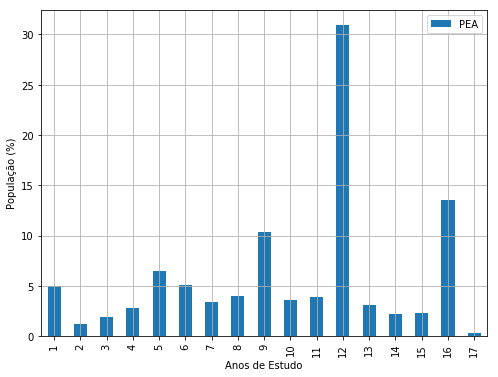

In [12]:
# População Economicamente Ativa vs Anos de estudo
pea_uf = pd.crosstab(ativos.ANOS_ESTUDO, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6))
plt.ylabel("População (%)")
plt.xlabel('Anos de Estudo')
plt.legend(["PEA"])
plt.grid(True);

Pelo gráfico acima, podemos perceber que a parte da população economicamente ativa, que frequentou alguma rede de ensino, possui 12 ou mais anos de estudo e isso indica que, ou o indivíduo está no terceiro ano do Ensino Médio ou já possui Ensino Médio concluído.Também há uma parcela menor que possui 16 anos ou mais de estudo ou seja, está cursando ou já cursou Ensino Superior.

Apoós comparar individualmente, é possível compará-las entre sí:

Text(0.5, 0, 'Regiões')

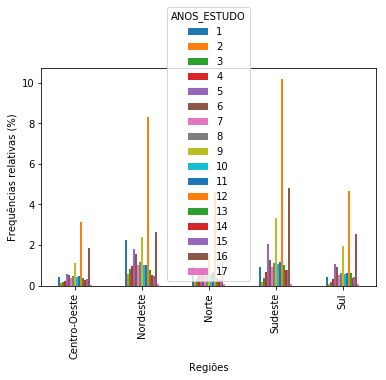

In [33]:
regi_anos = pd.crosstab(ativos.REGIAO, ativos.ANOS_ESTUDO, normalize=True)*100
regi_anos.plot(kind='bar')
plt.ylabel("Frequências relativas (%)")
plt.xlabel("Regiões")

## Conclusão 

Descreva aqui suas conclusões!

1 -  Maioria saiu do ensino médio

2 -  Maioria sabe ler e escrever

3 -  Maioria possui entre 20 e 50 anos de idade


Com todos os dados devidamente utilizados e filtrados, conseguimos identificar que o perfil do brasileiro economicamente ativo é o de que: Vive na região sudeste ou região nordeste, gira em torno de 20 e 50 anos de idade (com mais destaque para os de aproximadamente 30 anos de idade e entre 40 e 50 anos de idade), sabe ler e escrever, não frequentou nenhuma rede de ensino, sendo que grande parte da população economicamente ativa que frequentou alguma rede de ensino possui 12 anos ou mais de estudo e uma pequena parcela com Ensino Superior em andamento ou completo.